## Importing Necessary Libraries

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [16]:
digits = datasets.load_digits()

## View Sample Image

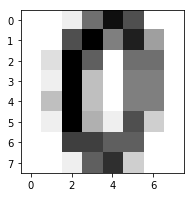

In [17]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[10], cmap=plt.cm.gray_r)

## Actual Image Pixel Matrix

In [7]:
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

## Flattened Vector

In [8]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

## Image Class Label

In [9]:
digits.target[10]

0

## BUILDING, TRAINING & TESTING DATASETS

### Build Model

In [18]:
X_digits = digits.data
y_digits = digits.target

num_data_points = len(X_digits)
X_train = X_digits[:int(.7 * num_data_points)]
y_train = y_digits[:int(.7 * num_data_points)]
X_test = X_digits[int(.7 * num_data_points):]
y_test = y_digits[int(.7 * num_data_points):]
print(X_train.shape, X_test.shape)

(1257, 64) (540, 64)


### Train Model

In [19]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predict and Evaluate Performance

In [22]:
print('Logistic Regression mean accuracy: %f' % logistic.score(X_test, y_test))

Logistic Regression mean accuracy: 0.900000


## Import Wisconsin Breast Cancer Data

In [20]:
import numpy as np
from sklearn.datasets import load_breast_cancer

# load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# CLUSTERING MODELS

## K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)

labels = km.labels_
centers = km.cluster_centers_
print(labels[:10])

[1 1 1 0 1 0 1 0 0 0]


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

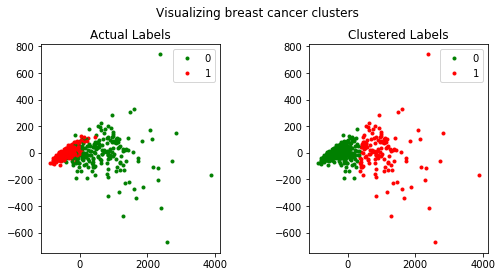

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])

## Hierarchial Clustering

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress=True)

Z = linkage(X, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


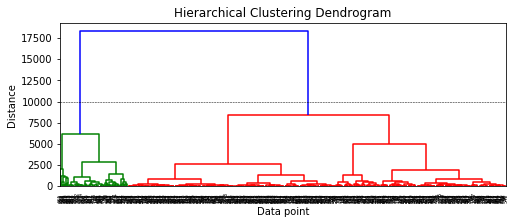

In [37]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

In [39]:
from scipy.cluster.hierarchy import fcluster

max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')

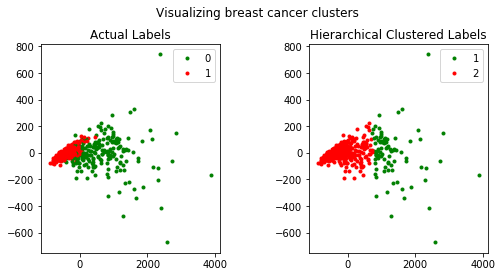

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])

# CLASSIFICATION MODEL METRICS

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [25]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Confusion Matrix

In [26]:
import model_evaluation_utils as meu

y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

          Predicted:     
                   0    1
Actual: 0         59    4
        1          2  106


### True +ve, False +ve, True -ve, False -ve

In [49]:
positive_class = 1
TP = 106
FP = 4
TN = 59
FN = 2

### Accuracy

In [50]:
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.96491
Manually Computed Accuracy: 0.96491


### Precision

In [51]:
fw_prec = round(meu.metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision: 0.96364
Manually Computed Precision: 0.96364


### Recall

In [52]:
fw_rec = round(meu.metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.98148
Manually Computed Recall: 0.98148


### F1 -Score

In [53]:
fw_f1 = round(meu.metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.97248
Manually Computed F1-Score: 0.97248


### ROC Curve and AUC

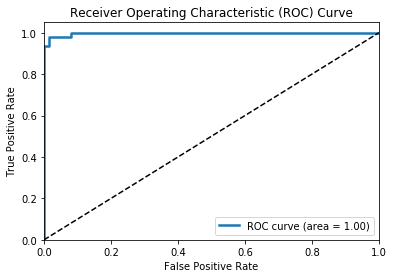

In [54]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

# CLUSTERING MODEL METRICS

## Build two clustering models on the breast cancer dataset

In [56]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_

## Homogeneity, Completeness and V-measure

In [62]:
from sklearn import metrics

km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneity, Completeness, V-measure metrics for num clusters=2: ', km2_hcv)
print('Homogeneity, Completeness, V-measure metrics for num clusters=5: ', km5_hcv)

Homogeneity, Completeness, V-measure metrics for num clusters=2:  [0.422 0.517 0.465]
Homogeneity, Completeness, V-measure metrics for num clusters=5:  [0.602 0.298 0.398]


## Silhouette Coefficient

In [63]:
km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km5_silc)

Silhouette Coefficient for num clusters=2:  0.6972646156059464
Silhouette Coefficient for num clusters=5:  0.5102292997907839


## Calinski-Harabaz Index

In [64]:
km2_chi = metrics.calinski_harabaz_score(X, km2_labels)
km5_chi = metrics.calinski_harabaz_score(X, km5_labels)

print('Calinski-Harabaz Index for num clusters=2: ', km2_chi)
print('Calinski-Harabaz Index for num clusters=5: ', km5_chi)

Calinski-Harabaz Index for num clusters=2:  1300.2082268895424
Calinski-Harabaz Index for num clusters=5:  1621.0110530063253


# MODEL TUNING

## Build and Evaluate Default Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# prepare datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build default SVM model
def_svc = SVC(random_state=42)
def_svc.fit(X_train, y_train)

# predict and evaluate performance
def_y_pred = def_svc.predict(X_test)
print('Default Model Stats:')
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=def_y_pred, classes=[0,1])

Default Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.6316
Precision: 0.3989
Recall: 0.6316
F1 Score: 0.489

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

   micro avg       0.63      0.63      0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0          0   63
        1          0  108


## Tune Model with Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

# setting the parameter grid
grid_parameters = {'kernel': ['linear', 'rbf'], 
                   'gamma': [1e-3, 1e-4],
                   'C': [1, 10, 50, 100]}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(SVC(random_state=42), grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
# view accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV:

0.95226 (+/-0.06310) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.91206 (+/-0.04540) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.95226 (+/-0.06310) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.92462 (+/-0.02338) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.96231 (+/-0.04297) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.90201 (+/-0.04734) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.96231 (+/-0.04297) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.92965 (+/-0.03425) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95729 (+/-0.05989) for {'C': 50, 'gamma': 0.001, 'kernel': 'linear'}
0.90201 (+/-0.04734) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.95729 (+/-0.05989) for {'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.93467 (+/-0.02975) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95477 (+/-0.05772) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.90201

## Evaluate Grid Search Tuned Model

In [29]:
gs_best = clf.best_estimator_
tuned_y_pred = gs_best.predict(X_test)

print('\n\nTuned Model Stats:')
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=tuned_y_pred, classes=[0,1])



Tuned Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.9708
Precision: 0.9709
Recall: 0.9708
F1 Score: 0.9708

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0         61    2
        1          3  105


## Tune Model with Randomized Search

In [30]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': scipy.stats.expon(scale=10), 
              'gamma': scipy.stats.expon(scale=.1),
              'kernel': ['rbf', 'linear']}

random_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_grid,
                                   n_iter=50, cv=5)
random_search.fit(X_train, y_train)

print("Best parameters set found on development set:")
random_search.best_params_

Best parameters set found on development set:


{'C': 13.969020974688842, 'gamma': 0.21774752356203353, 'kernel': 'linear'}

## Evaluate Randomized Search Tuned Model

In [31]:
rs_best = random_search.best_estimator_
rs_y_pred = rs_best.predict(X_test)
meu.get_metrics(true_labels=y_test, predicted_labels=rs_y_pred)

Accuracy: 0.9591
Precision: 0.9593
Recall: 0.9591
F1 Score: 0.9591


# MODEL INTERPRETATION

# MODEL DEPLOYMENT

In [48]:
from sklearn.externals import joblib
joblib.dump(logistic, 'lr_model.pkl') 

['lr_model.pkl']

## Load model from disk

In [49]:
lr = joblib.load('lr_model.pkl') 
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predict with loaded model

In [50]:
print(lr.predict(X_test[10:11]), y_test[10:11])

[1] [1]
